<a href="https://colab.research.google.com/github/archivesunleashed/notebooks/blob/main/arch/plain-text-file-information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plain Text Information Dataset Exploration

We're going to take a look at a few examples of how we can explore the Plain Text Information dataset. 

The first thing we need to do is enter the URL for our Plain Text Information dataset in the cell below. You can get this by right clicking the Download icon, and selecting "Copy Link".

In [1]:
dataset = 'https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-14489/TextFilesInformationExtraction/plain-text-file-information.csv.gz?access=EU3YV6KHNYNDTQ6XGAPHZG34NONNSPN7' #@param {type:"string"}
print(dataset)

https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-14489/TextFilesInformationExtraction/plain-text-file-information.csv.gz?access=EU3YV6KHNYNDTQ6XGAPHZG34NONNSPN7


## pandas

Next, we'll setup our environment so we can load our Plain Text Information dataset into [pandas](https://pandas.pydata.org) DataFrames. If you're unfamiliar with DataFrames, but you've worked with plain text before, you should feel comfortable pretty quick.

In [2]:
import pandas as pd

## Data Table Display

Colab includes an extension that renders pandas DataFrames into interactive displays that can be filtered, sorted, and explored dynamically. This can be very useful for taking a look at what each DataFrame provides, and doing some intital filtering!

Data table display for pandas dataframes can be enabled by running:
```python
%load_ext google.colab.data_table
```
and disabled by running
```python
%unload_ext google.colab.data_table
```

In [3]:
%load_ext google.colab.data_table

## Loading our ARCH Dataset as a DataFrame

---


Next, we'll create pandas DataFrame from our dataset, and show a preview of it using the Data Table Display.

In [4]:
plain_text = pd.read_csv(dataset, compression='gzip')
plain_text

,crawl_date,url,filename,extension,mime_type_web_server,mime_type_tika,md5,sha1,content
0,20200629191639,https://www.ualberta.ca/robots.txt,robots.txt,eml,text/plain,message/rfc822,94a881233d217b7cacb4130efb7a72f7,b2bc2c5967735caf53793689c15c33f3fe01ba15,User-Agent: *\r\nDisallow: /Components/\r\nDis...
1,20200629191729,https://code.jquery.com/robots.txt,robots.txt,txt,text/plain,text/plain,21ea2dba7fbd0eebea9d4a73701a71c0,ecb4e0f96af90eeff2cd0b6ab693d9087b58e268,User-agent: *\nDisallow: /wp-admin/\nAllow: /w...
2,20200629191803,https://cloudfront.ualberta.ca/robots.txt,robots.txt,txt,text/plain,text/plain,564086741af04a27a837567d7733bbbf,48dfe448ecf1970b8f06df0ee170e57f21b2608f,User-agent: *\nAllow: /design/\r\nAllow: /-/me...
3,20200629193131,http://feeds.feedburner.com/robots.txt,robots.txt,txt,text/plain,text/plain,7ef28ba52a7c3d04f85556189927c5e9,b7c8b329d7d7e23504fb5a4496767e20afd1c028,User-agent: *\nDisallow: /~a/
4,20200629213436,https://apps.ualberta.ca/robots.txt,robots.txt,txt,text/plain,text/plain,7f14758bc11ba0b09f25fa0ebd6be1e0,1835286935f2d846fb461bb603d42166f783ff1f,﻿User-agent: *\nDisallow: /catalogue/archive
...,...,...,...,...,...,...,...,...,...
40796,20220702192341,http://www.google.com/robots.txt,robots.txt,txt,text/plain,text/plain,b3375e3308859be561e01733c48fd54b,0bf933c19cb94c3be02a24a804cad0a58ad015fe,User-agent: *\nDisallow: /search\nAllow: /sear...
40797,20220702230032,https://www.uwo.ca/robots.txt,robots.txt,txt,text/plain,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
40798,20220703072533,https://uwo.ca/robots.txt,robots.txt,txt,text/plain,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
40799,20220703120206,https://www.google-analytics.com/robots.txt,robots.txt,txt,text/plain,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN


# Data Analysis

Now that we have all of our datasets loaded up, we can begin to work with them!

## Counting total files, and unique files

Let's take a quick look at how to count items in DataFrames, and use total and unique files as an example to work with.

It's definitely work checking out the [pandas documentation](https://pandas.pydata.org/docs/index.html). There are a lot of good examples available, along with a robust [API reference](https://pandas.pydata.org/docs/reference/index.html#api).


### How many plain text files are in this collection?

We can take our `plain text` variable try a couple of functions to get the same answer.

1.   `len(plain text.index)`
  * Get the length of the DataFrame's index.
2.   `plain text.shape[0]`
  * Get the shape or dimensionality of the DataFrame, and take the first item in the tuple.
3.  `plain text.count()`
  * Count the number of rows for each column.



In [5]:
len(plain_text.index)

40801

In [6]:
plain_text.shape[0]

40801

In [7]:
plain_text.count()

crawl_date              40673
url                     40622
filename                40587
extension               40622
mime_type_web_server    40622
mime_type_tika          16815
md5                     40622
sha1                    40622
content                 16815
dtype: int64

### How many unique plain text files are in the collection?

 We can see if an plain text files is unique or not by computing an [MD5 hash](https://en.wikipedia.org/wiki/MD5#MD5_hashes) of it, and comparing them. The exact same plain text file might have a filename of `example.jpg` or `foo.jpg`. If the hash is computed for each, we can see that even with different file names, they are actually the same plain text file. So, since we have both a `MD5` and `SHA1` hash column available in our DataFrame, we can just find the unique values, and count them!




In [8]:
len(plain_text.md5.unique())

15801

### What are the top 10 most occurring plain text files in the collection?

Here we can take advantage of [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html) to provide us with a list of MD5 hashes, and their respective counts.

In [9]:
plain_text["md5"].value_counts().head(10)

d41d8cd98f00b204e9800998ecf8427e    23807
f71d20196d4caf35b6a670db8c70b03d       16
d3b8d8cde26b65f660ff8f8b0879ee94       15
21ea2dba7fbd0eebea9d4a73701a71c0       14
a8644bee1eb0e268930450ebd2da94a7       11
96a33c0a63ffe7fd681d419ca495f7d1       10
22aa23a69764a92ed7ee0f2ed3ace4eb       10
ce7b19ac9a36535608fdcb41a64510ca       10
301f7ecc36e969e649a9152bc9e24172        8
97161b1fa79bb875345826d2720d677f        8
Name: md5, dtype: int64


### What's the information around all of the occurances of `d41d8cd98f00b204e9800998ecf8427e`?

What, you mean you don't know what `d41d8cd98f00b204e9800998ecf8427e` means? 

Let's find those plain text files in the DataFrame. We can here see some of the filenames used and information about them.


In [10]:
plain_text.loc[plain_text["md5"] == "d41d8cd98f00b204e9800998ecf8427e"]

,crawl_date,url,filename,extension,mime_type_web_server,mime_type_tika,md5,sha1,content
12,20200630192843,https://www.ualberta.ca/robots.txt,robots.txt,txt,text/plain,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
13,20200630222426,http://www.gradstudies.ualberta.ca/robots.txt,robots.txt,txt,text/plain,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
14,20200701151236,https://cloudfront.ualberta.ca/robots.txt,robots.txt,txt,text/plain,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
15,20200701195549,https://www.ualberta.ca/robots.txt,robots.txt,txt,text/plain,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
16,20200702173313,https://cloudfront.ualberta.ca/robots.txt,robots.txt,txt,text/plain,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
...,...,...,...,...,...,...,...,...,...
40795,20220702120220,http://tndms.ca/robots.txt,robots.txt,txt,text/plain,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
40797,20220702230032,https://www.uwo.ca/robots.txt,robots.txt,txt,text/plain,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
40798,20220703072533,https://uwo.ca/robots.txt,robots.txt,txt,text/plain,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
40799,20220703120206,https://www.google-analytics.com/robots.txt,robots.txt,txt,text/plain,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN


### What are the top 10 most occuring filenames in the collection?

Note that this is of course different than the MD5 results up above. Here we are focusing _just_ on filename. So `robots.txt` for example, might actually be referring to different plain text files who happen to have the same name.

Here we can use `value_counts()` again, but this time we'll create a variable for the top filenames so we can use it later.



In [11]:
top_filenames = plain_text["filename"].value_counts().head(10)
top_filenames

robots.txt                            13960
Release                                1152
Packages                                892
Packages.gz                             890
site.webmanifest                        191
Sources.gz                              164
glyphicons-halflings-regular.woff2      133
proximanova-light-webfont.woff2         122
proximanova-regular-webfont.woff2       122
proximanova-semibold-webfont.woff2      122
Name: filename, dtype: int64

### Let's create our first graph!

We'll plot the data first with pandas [plot](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html) functionality, and then plot the data with [Altair](https://altair-viz.github.io/).

Text(0, 0.5, 'Count')

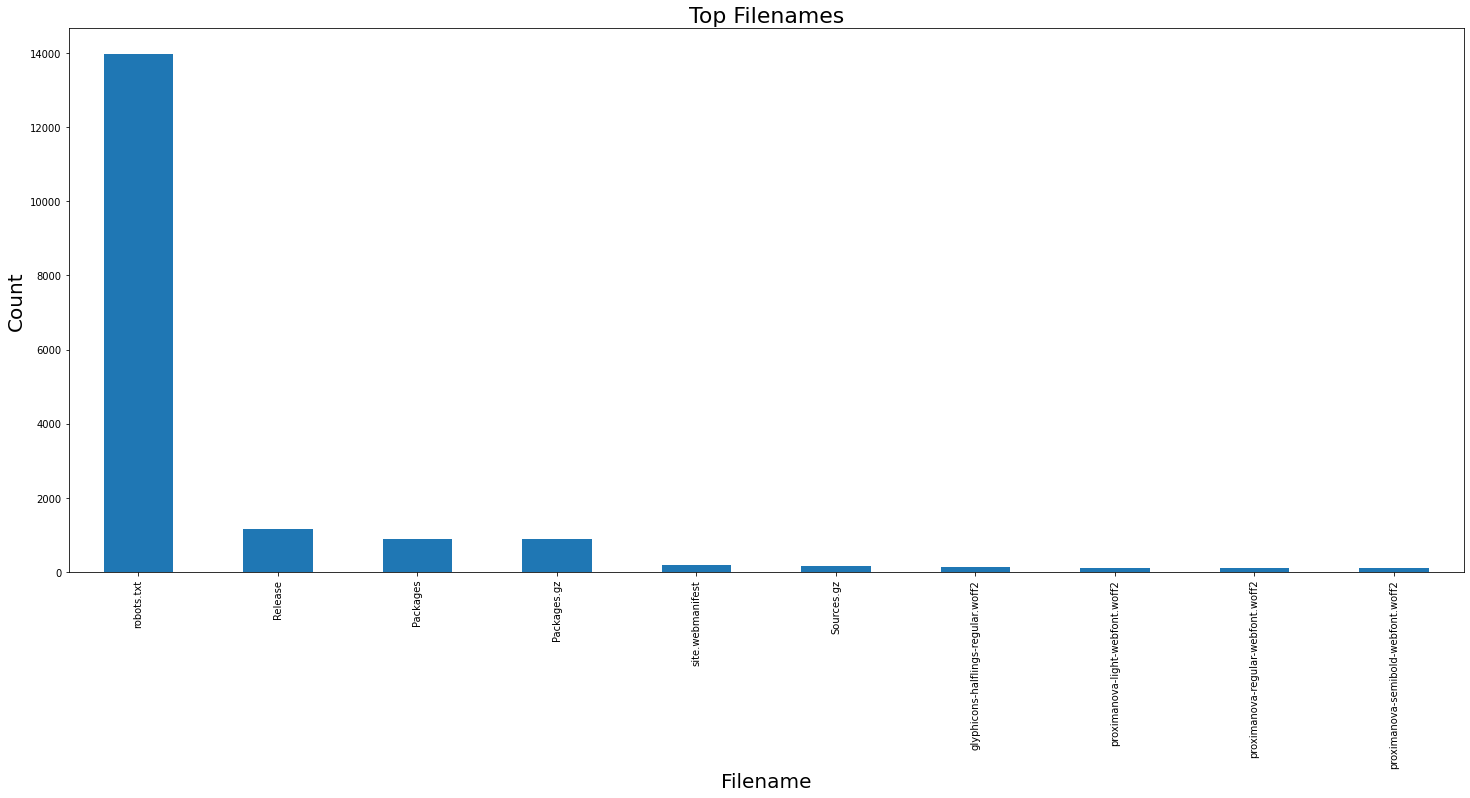

In [12]:
top_filenames_chart = top_filenames.plot.bar(figsize=(25, 10))

top_filenames_chart.set_title("Top Filenames", fontsize=22)
top_filenames_chart.set_xlabel("Filename", fontsize=20)
top_filenames_chart.set_ylabel("Count", fontsize=20)

Now let's setup [Altair](https://altair-viz.github.io/), and plot the data with Altair. Altair is useful for creating vizualizations since they can be easily exported as a PNG or SVG.

In [13]:
import altair as alt

In [14]:
top_filenames_altair = (
    plain_text["filename"]
    .value_counts()
    .head(10)
    .rename_axis("Filename")
    .reset_index(name="Count")
)

filenames_bar = (
    alt.Chart(top_filenames_altair)
    .mark_bar()
    .encode(x=alt.X("Filename:O", sort="-y"), y=alt.Y("Count:Q"))
)

filenames_rule = (
    alt.Chart(top_filenames_altair).mark_rule(color="red").encode(y="mean(Count):Q")
)


filenames_text = filenames_bar.mark_text(align="center", baseline="bottom").encode(
    text="Count:Q"
)

(filenames_bar + filenames_rule + filenames_text).properties(
    width=1400, height=700, title="Top Filenames"
)

alt.LayerChart(...)

### How about a file format distribution?

What _kind_ of plain text files are present? We can discover this by checking their "media type", or [MIME type](https://en.wikipedia.org/wiki/Media_type). 






In [15]:
plain_text_mime_types = (
    plain_text["mime_type_tika"]
    .value_counts()
    .head(5)
    .rename_axis("MIME Type")
    .reset_index(name="Count")
)

plain_text_mimes_bar = (
    alt.Chart(plain_text_mime_types)
    .mark_bar()
    .encode(x=alt.X("MIME Type:O", sort="-y"), y=alt.Y("Count:Q"))
)

plain_text_mime_rule = (
    alt.Chart(plain_text_mime_types).mark_rule(color="red").encode(y="mean(Count):Q")
)

plain_text_mime_text = plain_text_mimes_bar.mark_text(align="center", baseline="bottom").encode(
    text="Count:Q"
)

(plain_text_mimes_bar + plain_text_mime_rule + plain_text_mime_text).properties(
    width=1400, height=700, title="plain_text File Format Distribution"
)

alt.LayerChart(...)

### How do I get the actual plain text?

...or, how do I get to the actual binary files described by each file format information derivative?

There are a few options!

1. `wget` or `curl` from the live URL, or a replay URL
  * Live web URL
    * `wget` or `curl` the value of the `url` column
  * Replay web URL
    * `wget` or `curl` the value of the `crawl_date` and `url` column using the following pattern:
      * `https://web.archive.org/web/` + `crawl_date` + `/` + `url`
        * https://web.archive.org/web/20120119124734/http://www.archive.org/images/glogo.png
      * `http://wayback.archive-it.org/14462/` + `crawl_date` + `/` + `url`
        * https://wayback.archive-it.org/14462/20210524212740/https://ruebot.net/visualization/elxn42/featured_hu33a17dfb90e2c5ed77f783db14a6e53a_5126291_550x0_resize_q90_box_2.png
2. Use a scripting language, such as Python
  * Make use of the `url` and `filename` columns (and `crawl_date` if you want to use the replay URL)
  * `import requests`
  * `requests.get(url, allow_redirects=True)`
  * `open('filename', 'wb').write(r.content)`
3. Use the [Archives Unleashed Toolkit](https://aut.docs.archivesunleashed.org/docs/extract-binary) (if you have access to the W/ARC files).

If you wanted to download the plain text files using the replay URL, below a method for doing so.

First, you'll want to setup a replay url base url. Here we'll use the Archive-It Wayback instance for the collection.

In [16]:
wayback_url = 'http://wayback.archive-it.org/14489/'

Next we'll create a new column using a lambda function. If you're familiar with working in plain texts, what we're doing here is basically concatenating some column values together and creating a new column.

In [17]:
plain_text['replay_url'] = plain_text.apply(lambda row: str(wayback_url + str(row['crawl_date']) + "/" + str(row['url'])), axis=1)

Then we can export that new column we created out to a file, so we can use it with `wget` to download all the plain text files!

In [18]:
plain_text['replay_url'].head().to_csv('14489_plain_text_urls.txt', index=False, header=False)

Finally, we can pass the file to `wget` to use as a download list. You can also speed this process up using `xargs` or `parallel`.

In [19]:
!wget --random-wait -i 14489_plain_text_urls.txt

--2022-11-24 20:56:27--  http://wayback.archive-it.org/14489/20200629191639/https://www.ualberta.ca/robots.txt
Resolving wayback.archive-it.org (wayback.archive-it.org)... 207.241.232.8, 207.241.225.8
Connecting to wayback.archive-it.org (wayback.archive-it.org)|207.241.232.8|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132 [text/plain]
Saving to: ‘robots.txt’

robots.txt          100%[===================>]     132  --.-KB/s    in 0s      

2022-11-24 20:56:28 (36.1 MB/s) - ‘robots.txt’ saved [132/132]

--2022-11-24 20:56:28--  http://wayback.archive-it.org/14489/20200629191729/https://code.jquery.com/robots.txt
Reusing existing connection to wayback.archive-it.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 67 [text/plain]
Saving to: ‘robots.txt.1’

robots.txt.1        100%[===================>]      67  --.-KB/s    in 0s      

2022-11-24 20:56:33 (5.88 MB/s) - ‘robots.txt.1’ saved [67/67]

--2022-11-24 20:56:33--  http://wayback.archive-it.